In [51]:
import gym
import numpy as np
from IPython.display import clear_output
from collections import deque
import matplotlib.pyplot as plt
import random

In [52]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as layers

In [53]:
learning_rate=0.1
model = keras.Sequential([
    layers.Dense(2, input_shape=(4,))
])
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.MeanSquaredError()
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [54]:
epsilon = 1.0
exp_buffer = deque(maxlen=1000)
gamma = 0.9#discount rate

In [55]:
env = gym.make("CartPole-v1")
print(env)

<TimeLimit<CartPoleEnv<CartPole-v1>>>


In [59]:
def train():
    global epsilon, exp_buffer
    batch = random.choices(exp_buffer, k=min(50,len(exp_buffer)))
    #print(f"batch: {batch}\n")
    # batch starts as a list of all the experiences.
    # zip(*batches) creates a zip object (iterable without indexed access) where each 
    # item is a tuple containing all the categories of one experience (for example, one tuple contains all the states)
    # then, each tuple is converted to a list
    states, actions, next_states, rewards, dones = (list(col) for col in zip(*batch))
    print(states)
    predictions = model.predict(states)
    next_predictions = model.predict(next_states)
    
    q_next_list = [np.max(next_prediction) for pred in next_predictions]
    q_target_list = [reward+gamma*q_next for (reward, q_next) in zip(rewards,q_next_list)]
    
    for prediction,q_target in zip(predictions,q_target_list):
        prediction[action] = q_target
    
    model.train_on_batch(states,predictions)
    epsilon*=0.99

In [60]:
def get_action(state):
    return np.argmax(model.predict(np.expand_dims(state,0))[0]) if random.random()>epsilon else random.randint(0,1)

In [61]:
exp_buffer.clear()
episodes = 100
rewards = []
epsilon = 1.0
try:
    print("starting!")
    for episode in range(episodes):
        done = False
        state = env.reset()
        next_state = None
        total_reward=0
        while not done:
#             print(len(exp_buffer))
            action = get_action(state)
            #next_state, reward, done, info = env.step(action)
            experience = env.step(action)
            done = experience[2]
            exp_buffer.append([state, *experience])
            #total_reward+=reward
            train()
            #clear_output(wait=True
        rewards.append(total_reward)
        print(f"reward for episode {episode} (epsilon = {epsilon}): {total_reward}")
    print("done!")
finally:
    env.close()

starting!
[array([-0.04273631, -0.02283385,  0.01578713, -0.0359378 ])]


ValueError: in user code:

    c:\users\eric\projects\rl experiments\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    c:\users\eric\projects\rl experiments\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\eric\projects\rl experiments\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\eric\projects\rl experiments\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\eric\projects\rl experiments\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\eric\projects\rl experiments\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    c:\users\eric\projects\rl experiments\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    c:\users\eric\projects\rl experiments\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    c:\users\eric\projects\rl experiments\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 4 but received input with shape [None, 1]


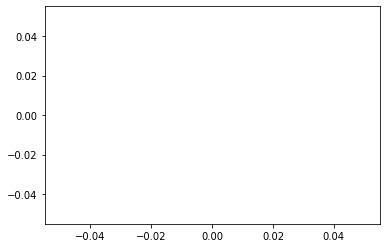

In [7]:
plt.plot(rewards)
plt.show()

In [52]:
x = keras.layers.Dense(2,input_shape=(4,))
print(x(np.expand_dims([1,2,3,4],0)))

tf.Tensor([[7.604945  0.3159716]], shape=(1, 2), dtype=float32)
